# 📦 Detección de Objetos con YOLOv8 (Ultralytics)

In [1]:
!pip install ultralytics opencv-python --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.7 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, fnmatch
from tqdm.auto import tqdm

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!unzip -qq images.zip

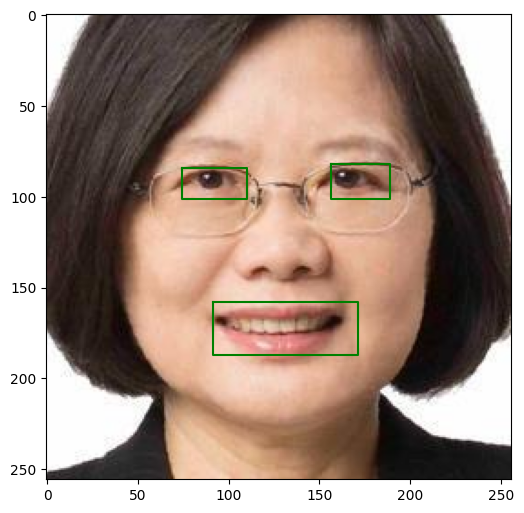

In [4]:
df = pd.read_csv('boundingbox.csv')
d = fnmatch.filter(sorted(os.listdir('images/')), '*.jpg')
i = 1
fname = d[i]
X = cv2.imread('images/'+fname)
plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
for k in range(len(df)):
    if df.File[k] == fname:
        x1, x2, y1, y2 = df.x1[k], df.x2[k], df.y1[k], df.y2[k]
        plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],c='g')
plt.show()

In [5]:
!mkdir -p labels
m = len(d)
n = len(df)
for i in tqdm(range(m)):
    fname = d[i]
    X = cv2.imread('images/'+fname)
    N, M = X.shape[0], X.shape[1]
    ok = 0
    for k in range(n):
        if df.File[k] == fname:
            x1, x2, y1, y2, c = df.x1[k], df.x2[k], df.y1[k], df.y2[k], df.c[k]
            wn = (x2 - x1) / M
            hn = (y2 - y1) / N
            xn = (x1 + x2) / 2 / M
            yn = (y1 + y2) / 2 / N
            if ok == 0:
                f = open('labels/' + fname[:-3] + 'txt', 'w+')
                ok = 1
            f.write(f'{c} {xn} {yn} {wn} {hn}\n')
    if ok:
        f.close()

  0%|          | 0/198 [00:00<?, ?it/s]

In [6]:
!mkdir -p data/images/train data/images/val data/images/test
!mkdir -p data/labels/train data/labels/val data/labels/test
p_train = 0.70
p_val = 0.10
nt = round(p_train * m)
nv = round(p_val * nt)
ii = np.vstack([np.zeros((nt-nv,1)), np.ones((nv,1)), 2*np.ones((m-nt,1))])
target = ['train','val','test']
for i in tqdm(range(m)):
    fname = d[i]
    tname = fname[:-3]+'txt'
    ti = target[int(ii[i])]
    os.system(f'cp images/{fname} data/images/{ti}')
    os.system(f'cp labels/{tname} data/labels/{ti}')


  0%|          | 0/198 [00:00<?, ?it/s]

/tmp/ipython-input-6-2088209231.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ti = target[int(ii[i])]


In [9]:
PATH_TRAIN = 'data/images/train'
PATH_VAL = 'data/images/val'
PATH_TEST = 'data/images/test'
N_CLASSES = 2
class_names = ['eye','mouth']
with open('data/data.yaml', 'w') as f:
    f.write(f'train: ../{PATH_TRAIN}\n')
    f.write(f'val: ../{PATH_VAL}\n')
    f.write(f'test: ../{PATH_TEST}\n')
    f.write(f'nc: {N_CLASSES}\n')
    f.write(f'names: {class_names}\n')

In [10]:
# ✅ Entrenamiento usando la API de Ultralytics
model = YOLO('yolov8s.pt')
results = model.train(data='data/data.yaml', epochs=100, imgsz=256, batch=8)

100%|██████████| 21.5M/21.5M [00:00<00:00, 188MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 332.0±115.4 MB/s, size: 9.3 KB)


train: Scanning /content/data/labels/train... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<00:00, 2448.61it/s]

train: New cache created: /content/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 343.9±177.8 MB/s, size: 9.3 KB)


val: Scanning /content/data/labels/val... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 17544.15it/s]

val: New cache created: /content/data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.547G          3      3.591      1.717         14        256: 100%|██████████| 16/16 [00:03<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         14         35      0.335        0.5      0.263     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.609G      2.227      1.779      1.307         19        256: 100%|██████████| 16/16 [00:01<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all         14         35      0.409      0.643      0.529      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.686G      2.175      1.374      1.302         12        256: 100%|██████████| 16/16 [00:01<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]

                   all         14         35      0.665      0.536      0.483      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      0.74G        2.1      1.417      1.297         11        256: 100%|██████████| 16/16 [00:02<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         14         35      0.338      0.679      0.531      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.818G      2.088      1.325      1.246         14        256: 100%|██████████| 16/16 [00:01<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.24it/s]

                   all         14         35       0.33      0.714      0.485      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.881G       2.07       1.31      1.254         26        256: 100%|██████████| 16/16 [00:01<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]

                   all         14         35       0.85      0.393      0.412      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.943G      2.033      1.375      1.243         33        256: 100%|██████████| 16/16 [00:01<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]

                   all         14         35       0.81      0.393      0.376      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.03G       2.05      1.252      1.191         19        256: 100%|██████████| 16/16 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all         14         35      0.614      0.696      0.623      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.09G      1.953      1.238      1.216         18        256: 100%|██████████| 16/16 [00:01<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]

                   all         14         35      0.536      0.911      0.743      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.15G      1.862      1.208      1.222         13        256: 100%|██████████| 16/16 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]

                   all         14         35      0.599      0.821      0.713      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.2G      1.875      1.127      1.164         30        256: 100%|██████████| 16/16 [00:01<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all         14         35      0.505      0.758      0.585      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.28G       1.97      1.125      1.218         20        256: 100%|██████████| 16/16 [00:01<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all         14         35      0.789      0.756      0.733      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.35G      1.854      1.055      1.179         26        256: 100%|██████████| 16/16 [00:01<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]

                   all         14         35      0.618      0.825      0.687      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.41G      1.884      1.124      1.181         12        256: 100%|██████████| 16/16 [00:01<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all         14         35      0.727       0.75      0.746      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.48G      1.795      1.119      1.142         14        256: 100%|██████████| 16/16 [00:01<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all         14         35      0.547      0.661      0.587      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.54G      1.789      1.117      1.105         21        256: 100%|██████████| 16/16 [00:01<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]

                   all         14         35      0.642      0.768      0.761      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.62G      1.777      1.136      1.118         14        256: 100%|██████████| 16/16 [00:01<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all         14         35      0.679      0.839      0.772      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.67G      1.782      1.053      1.143         19        256: 100%|██████████| 16/16 [00:01<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all         14         35      0.693      0.679      0.664      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.75G      1.675      1.011      1.082         22        256: 100%|██████████| 16/16 [00:01<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all         14         35      0.602      0.679      0.639      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.8G      1.672      1.015      1.123         20        256: 100%|██████████| 16/16 [00:01<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all         14         35      0.629      0.643      0.608      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.88G      1.659      1.021      1.086         24        256: 100%|██████████| 16/16 [00:01<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all         14         35        0.5      0.696      0.605      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.94G      1.645      1.081      1.105         15        256: 100%|██████████| 16/16 [00:01<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all         14         35      0.705      0.732      0.758      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         2G      1.756      1.092      1.118         22        256: 100%|██████████| 16/16 [00:01<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         14         35      0.654       0.75      0.771      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.07G      1.654       1.07      1.093         23        256: 100%|██████████| 16/16 [00:01<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]

                   all         14         35      0.635       0.67      0.651      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.13G      1.649      1.025       1.11         17        256: 100%|██████████| 16/16 [00:01<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all         14         35      0.593      0.679      0.606      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.2G      1.598     0.9908      1.076         26        256: 100%|██████████| 16/16 [00:01<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all         14         35      0.705      0.732      0.637      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.27G      1.624      0.997      1.116         13        256: 100%|██████████| 16/16 [00:01<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all         14         35      0.667      0.696      0.621      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.34G      1.576      1.002      1.082         22        256: 100%|██████████| 16/16 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]

                   all         14         35      0.585      0.632       0.57      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.4G      1.576      1.026      1.099         20        256: 100%|██████████| 16/16 [00:01<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all         14         35      0.668      0.714      0.682      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.47G      1.568      1.008      1.076         32        256: 100%|██████████| 16/16 [00:01<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]

                   all         14         35      0.642      0.672      0.628      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.53G      1.601      1.028       1.12         18        256: 100%|██████████| 16/16 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all         14         35      0.689       0.75       0.69      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.6G      1.628     0.9843      1.098         18        256: 100%|██████████| 16/16 [00:01<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]

                   all         14         35      0.664       0.75      0.695      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.66G      1.606     0.9768      1.097         18        256: 100%|██████████| 16/16 [00:01<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all         14         35      0.707      0.786      0.711      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.73G      1.627     0.9924      1.101         16        256: 100%|██████████| 16/16 [00:01<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all         14         35      0.599      0.683      0.519      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.8G      1.533     0.9565      1.074         15        256: 100%|██████████| 16/16 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         14         35      0.676       0.75      0.705      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.86G      1.555     0.9443      1.055         18        256: 100%|██████████| 16/16 [00:01<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         14         35      0.702       0.75      0.627      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.93G      1.537     0.9433      1.048         13        256: 100%|██████████| 16/16 [00:01<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all         14         35      0.677      0.714      0.584       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         3G      1.471     0.8991      1.015         14        256: 100%|██████████| 16/16 [00:01<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]

                   all         14         35      0.674      0.714       0.59      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.06G      1.536     0.9314      1.043         13        256: 100%|██████████| 16/16 [00:01<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all         14         35       0.68      0.732      0.733      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.12G      1.549     0.9668      1.078         15        256: 100%|██████████| 16/16 [00:01<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all         14         35      0.664      0.696      0.656      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.2G      1.526     0.9616      1.053         15        256: 100%|██████████| 16/16 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all         14         35      0.707      0.732      0.634      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.26G      1.532      0.934      1.048         32        256: 100%|██████████| 16/16 [00:01<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         14         35      0.776      0.804       0.83      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.33G       1.53     0.9576       1.06         11        256: 100%|██████████| 16/16 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all         14         35      0.683      0.714      0.618      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.39G      1.492     0.9388      1.058         16        256: 100%|██████████| 16/16 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.84it/s]

                   all         14         35      0.672      0.714      0.589      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.45G      1.455     0.8995      1.021         30        256: 100%|██████████| 16/16 [00:01<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all         14         35      0.701      0.714      0.634      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.51G      1.485     0.9054      1.037         16        256: 100%|██████████| 16/16 [00:01<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         14         35      0.832      0.867      0.825       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.59G       1.54      0.929      1.072         18        256: 100%|██████████| 16/16 [00:01<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all         14         35      0.798      0.839      0.835      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.65G      1.435     0.8742      1.035         31        256: 100%|██████████| 16/16 [00:01<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all         14         35      0.628      0.668      0.549      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.73G      1.464     0.8963      1.085         12        256: 100%|██████████| 16/16 [00:01<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         14         35      0.653      0.696      0.546      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.78G      1.451      0.868      1.014         22        256: 100%|██████████| 16/16 [00:01<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all         14         35      0.676      0.714      0.577      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.85G      1.359     0.8519     0.9953         26        256: 100%|██████████| 16/16 [00:01<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all         14         35      0.651        0.7      0.555      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.92G      1.308      0.853     0.9978         23        256: 100%|██████████| 16/16 [00:01<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all         14         35      0.695      0.768      0.651      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.98G      1.351     0.8668      1.016         27        256: 100%|██████████| 16/16 [00:01<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all         14         35      0.675      0.714      0.594      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.04G      1.328     0.8581      1.001         14        256: 100%|██████████| 16/16 [00:01<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all         14         35      0.647      0.696      0.632       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.13G      1.295     0.8306      1.003         22        256: 100%|██████████| 16/16 [00:01<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         14         35      0.603      0.625      0.535      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.18G      1.309     0.8273     0.9935         36        256: 100%|██████████| 16/16 [00:01<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all         14         35       0.62      0.661      0.569      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.26G      1.357     0.8304      1.004         22        256: 100%|██████████| 16/16 [00:01<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

                   all         14         35      0.684      0.732      0.631      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.31G      1.316     0.8033     0.9834         21        256: 100%|██████████| 16/16 [00:01<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]

                   all         14         35      0.737      0.786      0.695      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.39G      1.277     0.8141     0.9871         11        256: 100%|██████████| 16/16 [00:01<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         14         35      0.689      0.732       0.63      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.45G      1.386     0.8496      1.009         14        256: 100%|██████████| 16/16 [00:01<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all         14         35      0.678      0.732      0.606      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.51G      1.325      0.829      1.012         21        256: 100%|██████████| 16/16 [00:01<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all         14         35      0.652      0.679      0.633      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.59G      1.306     0.8118     0.9892         27        256: 100%|██████████| 16/16 [00:01<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         14         35      0.647      0.679      0.577      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.65G       1.31     0.8034      1.004         14        256: 100%|██████████| 16/16 [00:01<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all         14         35      0.702      0.714      0.627      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.72G      1.323     0.8122      1.013         21        256: 100%|██████████| 16/16 [00:01<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all         14         35      0.728      0.732      0.632      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.78G      1.274     0.7986     0.9842         21        256: 100%|██████████| 16/16 [00:01<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         14         35      0.715      0.714      0.604      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.83G        1.3     0.7891     0.9882         28        256: 100%|██████████| 16/16 [00:01<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all         14         35      0.664      0.696      0.571      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.91G      1.279     0.7739     0.9824         29        256: 100%|██████████| 16/16 [00:01<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all         14         35      0.725      0.732      0.661      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.98G      1.272     0.7848      0.992         15        256: 100%|██████████| 16/16 [00:01<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all         14         35      0.709      0.714      0.646      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.04G      1.299     0.7827     0.9898         22        256: 100%|██████████| 16/16 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         14         35      0.682      0.696      0.619      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.12G      1.238     0.7715     0.9787          9        256: 100%|██████████| 16/16 [00:01<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.99it/s]

                   all         14         35      0.721      0.731      0.677      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.17G      1.265     0.7544     0.9845         13        256: 100%|██████████| 16/16 [00:01<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all         14         35      0.648      0.661      0.586      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.23G      1.298     0.7532     0.9749         19        256: 100%|██████████| 16/16 [00:01<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]

                   all         14         35      0.625      0.643      0.555      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.31G       1.23     0.7751     0.9778         12        256: 100%|██████████| 16/16 [00:01<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all         14         35      0.717      0.732      0.649      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.37G      1.209     0.7595     0.9746         21        256: 100%|██████████| 16/16 [00:01<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]

                   all         14         35      0.719      0.732      0.657      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.43G      1.237     0.7584     0.9805         21        256: 100%|██████████| 16/16 [00:01<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         14         35      0.598      0.625      0.534      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.51G      1.178      0.764     0.9549          8        256: 100%|██████████| 16/16 [00:01<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all         14         35      0.613      0.643      0.531      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.56G       1.25     0.7367     0.9616         17        256: 100%|██████████| 16/16 [00:01<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all         14         35      0.735      0.767      0.684      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.62G      1.177     0.7124     0.9299         29        256: 100%|██████████| 16/16 [00:01<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all         14         35      0.719      0.749      0.667      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.71G      1.188     0.7177     0.9659         18        256: 100%|██████████| 16/16 [00:01<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all         14         35      0.686       0.71      0.602       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.76G      1.179     0.7012     0.9563         22        256: 100%|██████████| 16/16 [00:01<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all         14         35      0.696      0.712      0.616      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.84G      1.188     0.7097     0.9426         24        256: 100%|██████████| 16/16 [00:01<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         14         35      0.682      0.729      0.616      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       5.9G      1.168     0.7093      0.979         13        256: 100%|██████████| 16/16 [00:01<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]

                   all         14         35       0.69      0.712      0.608      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.97G      1.159     0.6878     0.9267         23        256: 100%|██████████| 16/16 [00:01<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]

                   all         14         35      0.687      0.712       0.62      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.03G      1.141     0.6891      0.945         19        256: 100%|██████████| 16/16 [00:01<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         14         35       0.72      0.745       0.65      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       6.1G        1.1     0.6702     0.9426         14        256: 100%|██████████| 16/16 [00:01<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all         14         35      0.705      0.728       0.64      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.17G      1.081     0.6598     0.9432         11        256: 100%|██████████| 16/16 [00:01<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.84it/s]

                   all         14         35      0.725      0.732      0.672      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.24G      1.173       0.71      0.959         15        256: 100%|██████████| 16/16 [00:01<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]

                   all         14         35      0.684       0.71      0.648      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.29G      1.111     0.6571     0.9657         26        256: 100%|██████████| 16/16 [00:01<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all         14         35      0.699      0.714      0.648      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.36G      1.123     0.6561     0.9415         12        256: 100%|██████████| 16/16 [00:01<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         14         35      0.797      0.804      0.772      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.42G      1.196     0.6731     0.9529         25        256: 100%|██████████| 16/16 [00:01<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all         14         35      0.794      0.821      0.781      0.299


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       6.5G      1.037     0.6716     0.9296         12        256: 100%|██████████| 16/16 [00:01<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all         14         35      0.691      0.714      0.631      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.56G      1.024     0.6454     0.9472         12        256: 100%|██████████| 16/16 [00:01<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all         14         35      0.675      0.696      0.612      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.63G      1.028     0.6544     0.9347         13        256: 100%|██████████| 16/16 [00:01<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]

                   all         14         35      0.689      0.714      0.619      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.69G     0.9967     0.6625     0.9235         12        256: 100%|██████████| 16/16 [00:01<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         14         35       0.69      0.713      0.626      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.77G     0.9797     0.6492     0.9244         12        256: 100%|██████████| 16/16 [00:01<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         14         35      0.687      0.713       0.63       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.82G     0.9901     0.6364     0.9513         11        256: 100%|██████████| 16/16 [00:01<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         14         35      0.688      0.714      0.633      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.88G     0.9673      0.621     0.9175         11        256: 100%|██████████| 16/16 [00:01<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all         14         35      0.702      0.732      0.647      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.95G     0.9612     0.6435     0.9328         15        256: 100%|██████████| 16/16 [00:01<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

                   all         14         35      0.701      0.732      0.646       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.01G     0.9873     0.6014     0.9243         14        256: 100%|██████████| 16/16 [00:01<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]

                   all         14         35      0.685      0.714      0.636       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.08G      0.986     0.6223      0.929         13        256: 100%|██████████| 16/16 [00:01<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

                   all         14         35      0.686      0.714      0.637       0.28



100 epochs completed in 0.054 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]


                   all         14         35      0.654       0.75       0.77      0.326
                   eye         14         28      0.915      0.929      0.913      0.425
                 mouth          7          7      0.394      0.571      0.627      0.227
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


In [11]:
# ✅ Validación
metrics = model.val()
print(metrics)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 449.3±137.8 MB/s, size: 8.9 KB)


val: Scanning /content/data/labels/val.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


                   all         14         35      0.654       0.75      0.771      0.328
                   eye         14         28      0.915      0.929      0.914      0.431
                 mouth          7          7      0.394      0.571      0.627      0.226
Speed: 0.1ms preprocess, 11.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9e0a832310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,   

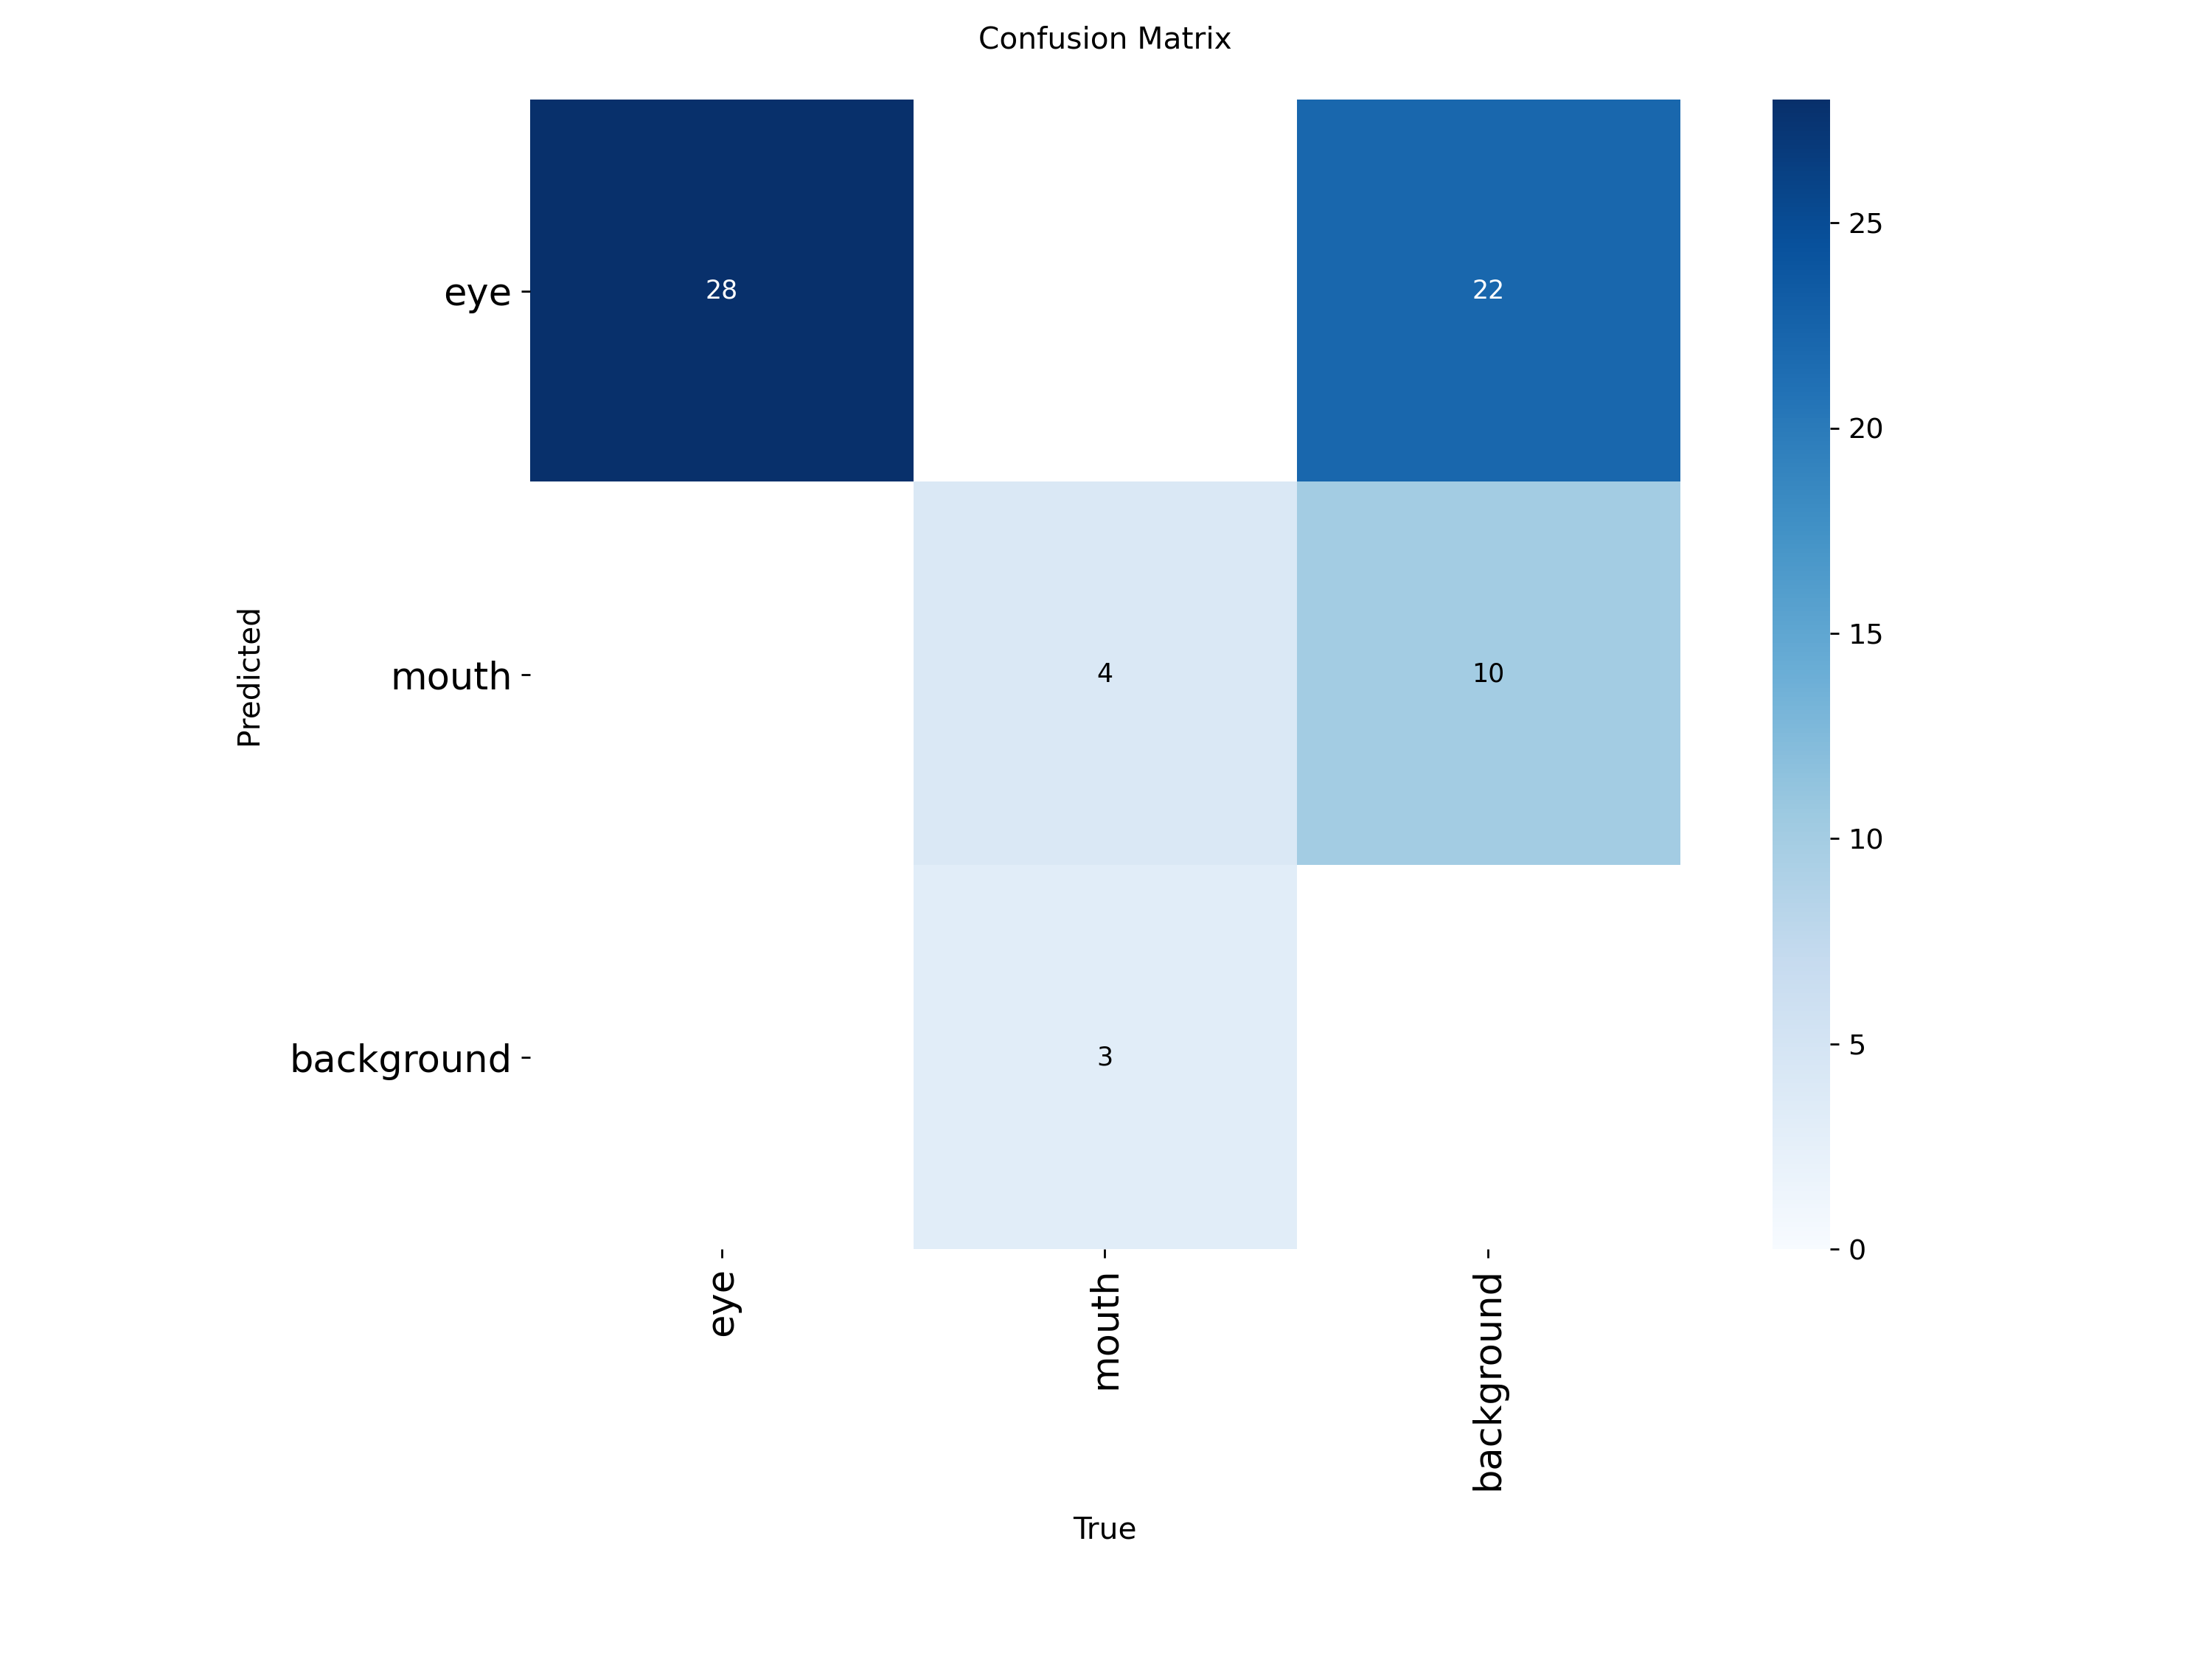

In [15]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)